#**Biophysics Assigment 2**
##The Lorenz equations - atmosferic convection
##Wouter Room - Bachelor 2

In this assignment we will be working with the Lorenz equations, this is a mathematical model for atmospheric convection given by:
$$X' = \sigma(Y-X)$$
$$Y'=X(\rho-Z)-Y$$
$$Z'=XY-\beta Z$$
Where:\
X is proportional to the rate of convection\
Y is proportional to the horizontal temperature variation\
Z is proportional the vertical temperature variation\
$\sigma, \rho$ and $\beta$ are positive constants

In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as wdg
from sympy import symbols, solve
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets, fixed

In [2]:
X = symbols("X")
Y = symbols("Y")
Z = symbols("Z")

D = symbols("D") #as sigma
p = symbols("p") #as rho
B = symbols("B") #as bèta

X_prime = D*(Y-X) + 0*Z
Y_prime = X*(p-Z)-Y
Z_prime = X*Y-B*Z

###1) What behavior does the system show for ρ < 1? Compute the number of equilibria, compute the stability of the equilibria via the Jacobean and show with a 3D plot (add arrows to your plot).

We will set for the first exercise $\sigma=10$ and $\beta=8/3$ and we will let $\rho$ vary\
Now we will get the equilibria of this system in function of $\rho$, from X' we learn that X =Y and form Y' we learn that $Z = \rho - 1$, when we put this in Z' we find that:
$$X = Y=\pm\sqrt{\beta(\rho -1)}$$\
We can see that there will be complex equilibria with no physical interpretation if $\rho < 1$. Note that there got some information lost by simplifying these equations, (0, 0, 0) is an equilibrium as well and is thus independent of $\sigma, \rho, \beta$\
To determine the stability of this equilibrium we will calculate the eigenvalues of the jacobian of the system, there are three different outcomes:


*   All the eigenvalues are negative: Stable node
*   All the eigenvalues are positive: Unstable node
* Some are positive and some negative: Saddle point  \

Calculating the eigenvalues goes as follows:\
Fist we calculate the jacobian it self
$$J = \begin{bmatrix}
        \frac{\partial X'}{\partial X} & \frac{\partial X'}{\partial Y} & \frac{\partial X'}{\partial Z}\\
        \frac{\partial Y'}{\partial X} & \frac{\partial Y'}{\partial Y} & \frac{\partial Y'}{\partial Z}\\
        \frac{\partial Z'}{\partial X} & \frac{\partial Z'}{\partial Y} & \frac{\partial Z'}{\partial Z}
\end{bmatrix} = \begin{bmatrix}
        -\sigma & \sigma & 0 \\
        \rho - Z & -1 & -X\\
        Y & X & -\beta
\end{bmatrix}$$
Now we can find the eigenvalues of this matrix by solving this equation to $\lambda$\
$$det(J-\lambda I)=0 \Leftrightarrow \lambda^3+41/3\lambda^2+(118/3-10\rho)\lambda+80/3(1-\rho)=0$$\
From this we find that all three eigenvalues negative are, independent of the value of $\rho$, with $0<\rho<1$. We can conclude that (0, 0, 0) is a stable equilibrium.

In [3]:
def velocity(X, Y, Z, p, D=10, B=8/3):

  return np.array([D*(Y-X), X*(p-Z)-Y, X*Y-B*Z])

In [4]:
dt1 = 0.01

def plot_trajectory(x, y, z, ax, fig, p):

    start_point = x, y, z
    x_list, y_list, z_list = [x], [y], [z] #makes a list of each start point so we can append other points later on

    for i in range(5000): #does not have to be 2000, eventually the point which are added to the list will be all the same
        vel = velocity(x_list[-1], y_list[-1], z_list[-1], p)

        x_list.append(x_list[-1] + vel[0] * dt1)
        y_list.append(y_list[-1] + vel[1] * dt1)
        z_list.append(z_list[-1] + vel[2] * dt1)

    XX, YY, ZZ = np.array(x_list), np.array(y_list), np.array(z_list) #makes arrays because its easier to plot

    if question1: #plotting is split up in three, first is for the ledgend and the first trajectory, second is for the rest
                  #and the third is for section two
      if n == 0:
        ax.plot(XX, YY, ZZ, color="black", linestyle='dashed', label="Trajectory to the equilibrium")
        ax.scatter(*start_point, color="midnightblue", s=100, label="start_point")
        ax.quiver(*start_point, *velocity(*start_point, p), color="goldenrod", length=0.015, linewidth=3, label="initial direction")

      else:
        ax.plot(XX, YY, ZZ, color="black", linestyle='dashed')
        ax.scatter(*start_point, color="midnightblue", s=100)
        ax.quiver(*start_point, *velocity(*start_point, p), color="goldenrod", length=0.015, linewidth=3)

    else:
      fig = plt.figure(figsize=(14, 6))
      ax = fig.add_subplot(projection='3d')
      ax.clear()

      ax.plot(XX, YY, ZZ, color="b", linewidth=0.5, label="Trajectory to the equilibrium")
      ax.scatter(*start_point, color="orange", s=100, label="start_point")
      ax.scatter(np.sqrt(8/3*(p-1)), np.sqrt(8/3*(p-1)), p-1, c="red", s=100, label=r"Equilibrium = ($\sqrt{\beta(\rho -1)}$, $\sqrt{\beta(\rho -1)}$, $\rho -1)$")
      ax.scatter(-1*np.sqrt(8/3*(p-1)), -1*np.sqrt(8/3*(p-1)), p-1, c="green", s=100, label=r"Equilibrium = ($-\sqrt{\beta(\rho -1)}$, $-\sqrt{\beta(\rho -1)}$, $\rho -1$)")

      fig.legend(loc="center right")
      ax.set_xlabel("X")
      ax.set_ylabel("Y")
      ax.set_zlabel("Z")
      plt.show()

    ax.legend(loc="best")

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

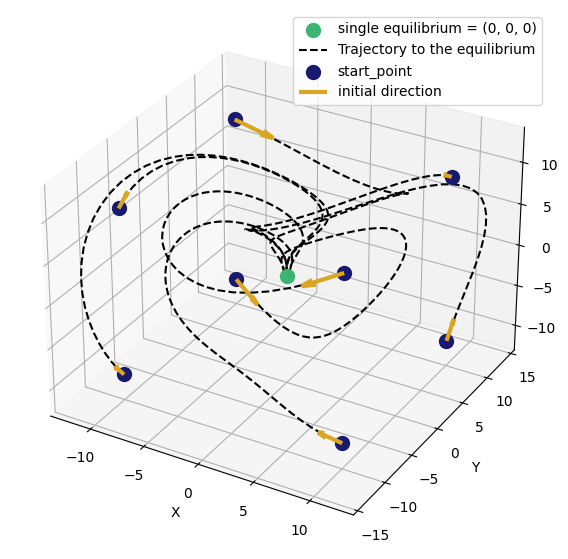

In [5]:
n = 0
p = 0.5
question1 = True
fig1 = plt.figure(figsize=(14, 7))

start_points = [(10, 10, 10), (-10, 10, 10), (10, -10, 10), (10, 10, -10),\
 (-10, -10, 10), (-10, 10, -10), (10, -10, -10), (-10, -10, -10)] # List with the point we are checking

ax1 = fig1.add_subplot(projection='3d') #Setting a 3D plot
ax1.scatter(0, 0, 0, color="mediumseagreen", s=100, label="single equilibrium = (0, 0, 0)")

for point in start_points:
  plot_trajectory(point[0], point[1], point[2], ax1, fig1, p)
  n = 1

We can see that each point goes exactly to (0, 0, 0), from this we can conclude that this is a point attractor

###2) Now vary ρ so it passes 1. What type of bifurcation do you see? Explain with the eigenvalues.

We don't have to write much code for this part, most of it can be reused from exercise one

In [6]:
question1 = False #Used so we can use the same function from question 1

#Calling the function using a widget
widgets.interact(plot_trajectory, x=(-10, 10, 1), y=(-10, 10, 1), z=(-10, 10, 1), ax=fixed(None), fig=fixed(None), p=(1, 28, 1))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

<function __main__.plot_trajectory(x, y, z, ax, fig, p)>

When $\rho$ becomes larger than 1, there will be two extra equilibria, we can see from the 3D graph above that these two equilibriua will be limit cycle attractors since the trajectory never reaches one of the equilibrium.

###3)Continue this analysis until ρ = 28. Make a plot with (ρ, X), (ρ, Y) and (ρ, Z) where you show the different equilibria and its type (stable versus unstable).

As seen in section 1, the equilibria of the system are given by:
$$X = Y = \pm \sqrt{\beta(\rho - 1)}$$
$$Z = \rho - 1$$\
and (0, 0, 0) as well. By calculating the eigenvalues of these equilibria and looking at the real parts we can find the stability. If all three the eigenvalues are negative, there will be a stable node otherwise it will be unstable.

In [7]:
titles = r"The three equilibria of X: ($\sqrt{\beta(\rho -1)}, -\sqrt{\beta(\rho -1)}, 0$)",\
           r"The three equilibria of Y: $\sqrt{\beta(\rho -1)}, -\sqrt{\beta(\rho -1)}, 0$",\
           r"The two equilibria of Z: $(\rho -1, 0)$" #The titles in a list so we can use one line

ylabels = "X", "Y", "Z"

D, B = 10, 8/3
pp = np.linspace(1, 28, 250)[1:]

#solving the equilibria manuel
eq_X1 = list(np.sqrt(D*(pp-1)))
eq_X2 = list(-1*np.sqrt(D*(pp-1)))
eq_X3 = list(0*pp)

eq_Y1 = list(np.sqrt(D*(pp-1)))
eq_Y2 = list(-1*np.sqrt(D*(pp-1)))
eq_Y3 = list(0*pp)

eq_Z1 = list(pp-1)
eq_Z2 = list(pp-1)
eq_Z3 = list(0*pp)

equilibria = (eq_X1, eq_Y1, eq_Z1), (eq_X2, eq_Y2, eq_Z2), (eq_X3, eq_Y3, eq_Z3)

In [8]:
L = symbols("L")
#Function witch takes a point and a parameter and gives back a boolean of whether the point is stabel
def stable_via_eigenvalues(x, y, z, p):

  D, B = 10, 8/3
  function = L**3+L**2*(D+B+1)+L*(B+x**2+D*(z-p+B+1))+D*(B*(z-p+1)+x**2+x*y)

  eigenvalues = solve(function, L)
  real_parts = [float(eig.evalf().as_real_imag()[0]) for eig in eigenvalues]

  if all(real_part < 0 for real_part in real_parts): #Checks if all eigenvalues are negative
      return True
  else:
      return False

In [9]:
#Function that gives lists with boolians corresponding to the stabilitie
def stabilitie(equilibria):
  stable_index = [[], [], []], [[], [], []], [[], [], []]

  for eq_n in equilibria:
    index = equilibria.index(eq_n)

    for n in range(len(pp)):
      stable = stable_via_eigenvalues(eq_n[0][n], eq_n[1][n], eq_n[2][n] ,pp[n])
      stable_index[index][0].append(stable), stable_index[index][1].append(stable), stable_index[index][2].append(stable)

  return stable_index

In [10]:
#plots the equilibria in function of p
def plot_equilibria(axes, n, equilibria, stable_index):
  ax = axes[n]

  for i in range(3):
    a = ax.plot(pp[stable_index[i][n]], np.array(equilibria[i][n])[stable_index[i][n]], c="limegreen", linewidth=3)

    #Swapping the stabilitie list, True-> False and vice versa, to plot the unstable point
    unstable_index = [not value for value in stable_index[i][n]]
    b = ax.plot(pp[unstable_index], np.array(equilibria[i][n])[unstable_index], c="crimson", linestyle="dashed", linewidth=3)

  #Setting our labels
  a[0].set_label("Stable equilibrium")
  b[0].set_label("Unstable equilibrium")

  if n < 2:
    ax.scatter(1, 0, c="cornflowerblue", label="Pitchfork biffurcation", s=100)
  else:
    ax.scatter(1, 0, c="greenyellow", label="Hopf biffurcation", s=100)

  ax.legend()

  # setting the plots for each system
  ax.set_title(titles[n])
  ax.set_xlabel(r"parameter $\rho$")
  ax.set_ylabel(ylabels[n])
  fig3.tight_layout()

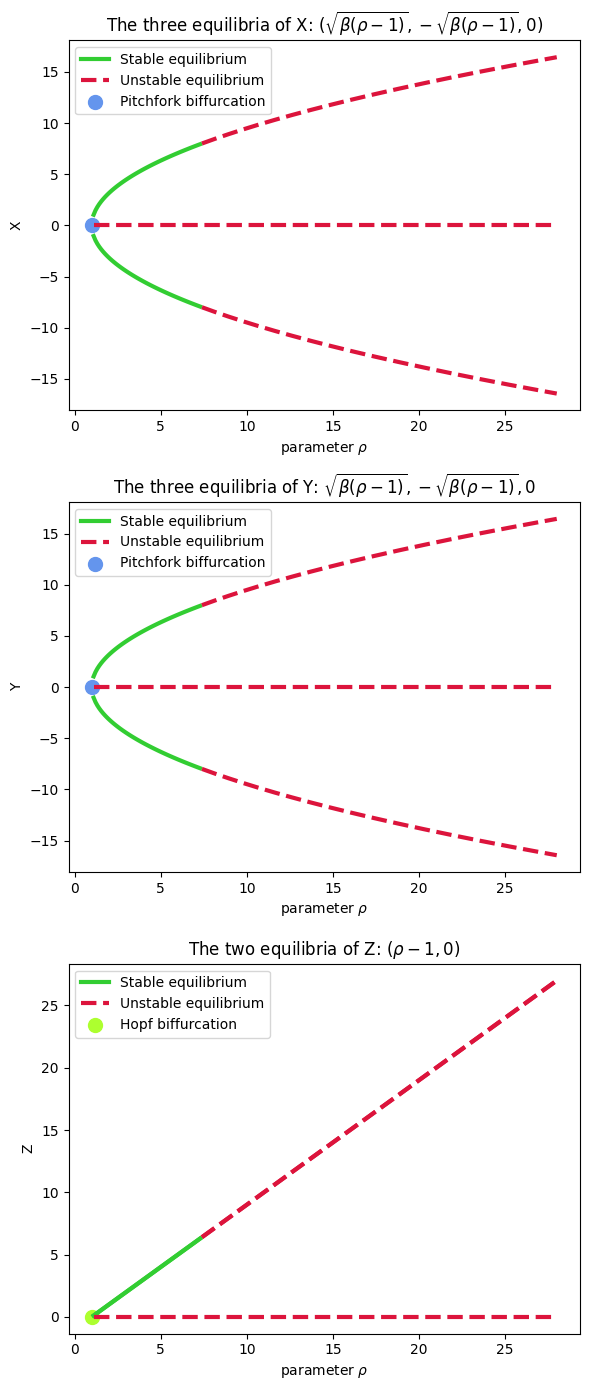

In [11]:
fig3, axes3 = plt.subplots(3, 1, figsize=(6, 14)) #creating the diffrend subplots
stable_index = stabilitie(equilibria) #Calling the stabilitie function

for n in range(3):
  plot_equilibria(axes3, n, equilibria, stable_index)

The stable part should go further but unfortunately i was not able to find the bug responsible for these incorrect values. We see that there is a pitchfork bifurcation in $X(\rho)$ and $Y(\rho)$ and a hopf bifurcation in $Z(\rho)$

###4) Show some figures where you plot x(t), y(t), z(t) around the value of ρ = 24.06 (set ρ = 22.05 and ρ = 25). What do you see? Be aware that you results should not depend on your integration parameter dt! Also show that your stable points are in fact stable. What do you notice?

It would be very complicated to solve the 3 differential equations and than solving X(t), Y(t), Z(t) from the system. Instead we will do it numerically.

In [12]:
titles = (r"X(t) for $\rho=22.05$", r"Y(t) for $\rho=22.05$", r"Z(t) for $\rho=22.05$"),\
         (r"X(t) for $\rho=25.00$", r"Y(t) for $\rho=25.00$", r"Z(t) for $\rho=25.00$")

xlabel = "time (t)"
ylabels = "X(t)", "Y(t)", "Z(t)"
xyz = "x", "y", "z"

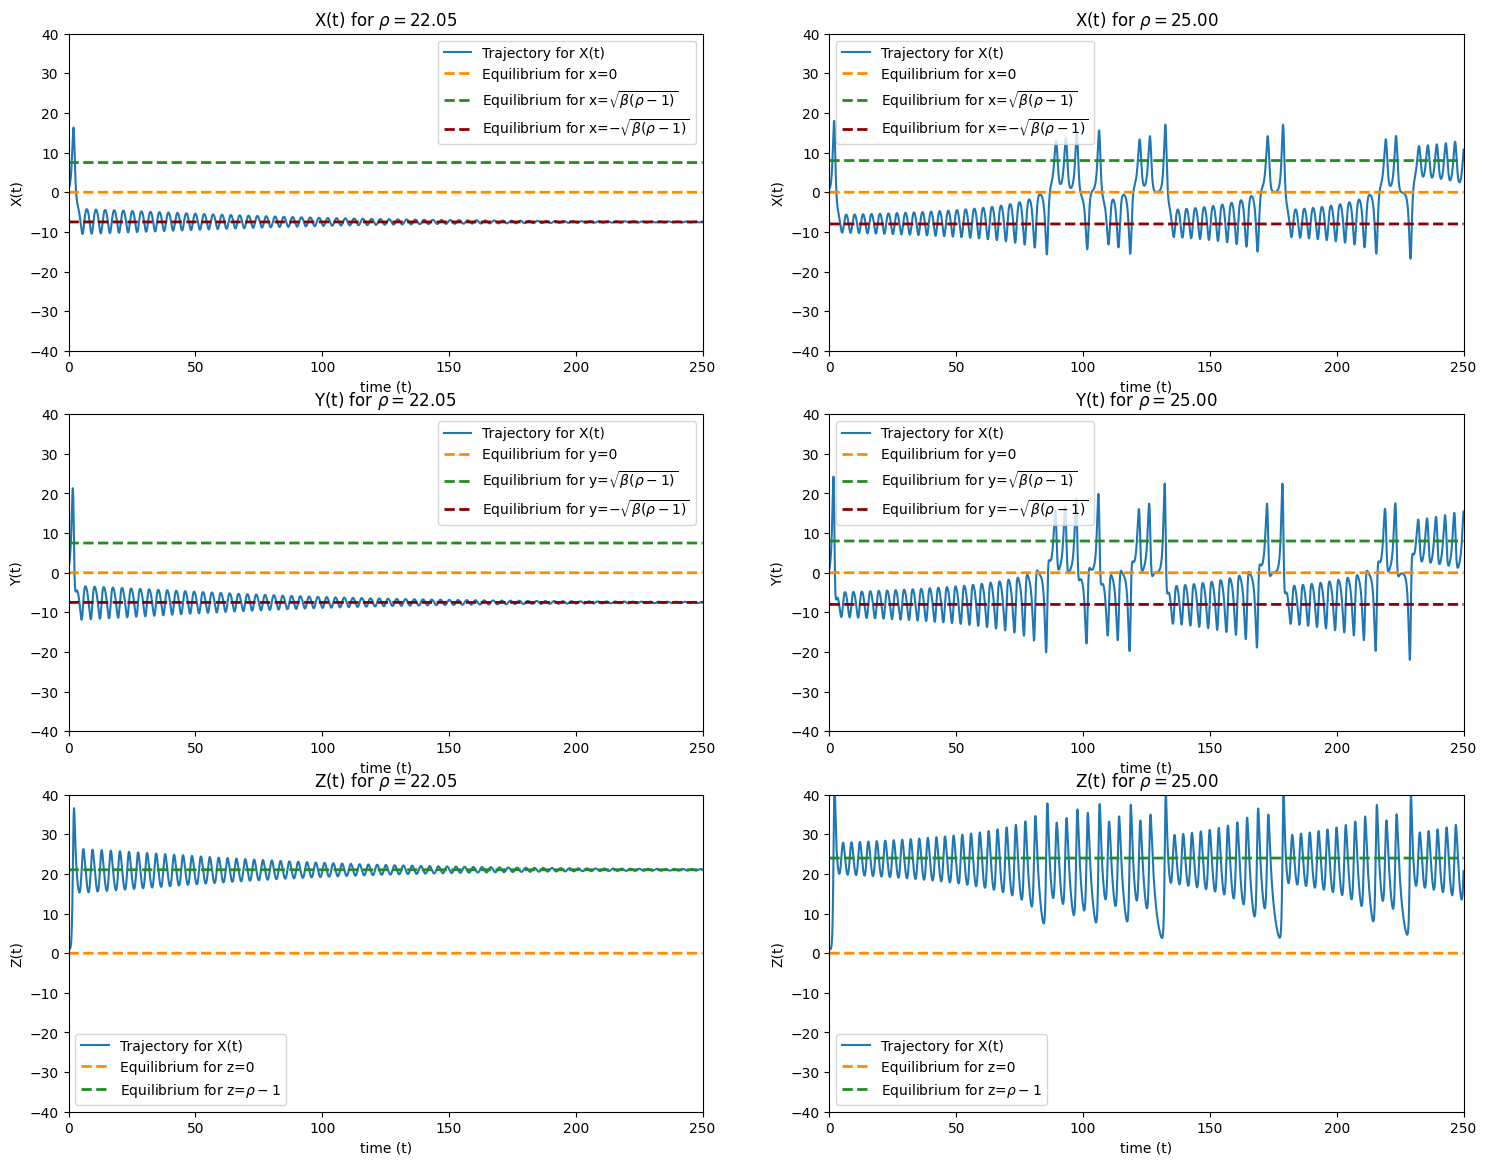

In [13]:
dt2 = 0.001
tt = np.linspace(0, 250, 50000)

def euler_integration():
  pp = 22.05, 25
  fig4, axes4 = plt.subplots(3, 2, figsize=(18, 14))

  for n in 0, 1:
    x, y, z = [1], [1], [1]

    for i in tt[1:]: #Using euler integration
      x.append(x[-1] + dt2*velocity(x[-1], y[-1], z[-1], pp[n], D=10, B=8/3)[0])
      y.append(y[-1] + dt2*velocity(x[-1], y[-1], z[-1], pp[n], D=10, B=8/3)[1])
      z.append(z[-1] + dt2*velocity(x[-1], y[-1], z[-1], pp[n], D=10, B=8/3)[2])

    xyz_tuple = np.array(x), np.array(y), np.array(z)

    for j in range(3):

      axes4[j][n].plot(tt, xyz_tuple[j], label="Trajectory for X(t)")
      axes4[j][n].set_title(titles[n][j])
      axes4[j][n].set_xlabel(xlabel)
      axes4[j][n].set_ylabel(ylabels[j])

      axes4[j][n].plot(tt, 0*np.linspace(1, 1, 50000), linestyle="dashed", c="darkorange",\
                       linewidth="2", label=f"Equilibrium for {xyz[j]}=0")
      if j != 2:
        axes4[j][n].plot(tt, np.sqrt(B*(pp[n]-1))*np.linspace(1, 1, 50000), linestyle="dashed",\
                         c="forestgreen", linewidth="2", label=f"Equilibrium for {xyz[j]}"r"=$\sqrt{\beta(\rho -1)}$")

        axes4[j][n].plot(tt, -1*np.sqrt(B*(pp[n]-1))*np.linspace(1, 1, 50000), linestyle="dashed",\
                         c="darkred", linewidth="2", label=f"Equilibrium for {xyz[j]}"r"=$-\sqrt{\beta(\rho -1)}$")
      else:
        axes4[j][n].plot(tt, (pp[n]-1)*np.linspace(1, 1, 50000), linestyle="dashed",\
                         c="forestgreen", linewidth="2", label=f"Equilibrium for {xyz[j]}"r"=$\rho -1$")

      axes4[j][n].legend()
      axes4[j][n].set_xlim(0, 250)
      axes4[j][n].set_ylim(-40, 40)

  fig3.tight_layout()
  plt.show()

euler_integration()

We notice that for $\rho=22.05$ the trajectory converges to a certain value, we can see in our plots that this value always will be an equilibrium, note that it will never be the (0, 0, 0) equilibrium. On the other hand when $\rho=25.00$, the system behaves chaotic and will never converges to a single value, but the system does oscillate Never around (0, 0, 0) but it does around the other ones, for X(t) and Y(t) so we can see that it oscillate around 2 differed values, both equilibria, and for Z(t) only around one. Note that the system does not oscillate periodically, it looks like it but each oscillation is a little bit differed, this is a typical for chaotic systems.

###5. For ρ = 24.06 you will find a chaotic attractor. Let us have a closer look at this attractor. Plot Z as a function of Y for a range of time, so you can see that the solution just leaves one side of the attractor and then goes to the other side of the attractor. What qualitative behavior do you observe in terms of switching the wings of the attractor? Think of a nice way to show this behavior.

In [14]:
dt3 = 0.01
p = 24.06
X, Y, Z = -10, -10, -10

def Y_ifo_Z(Trajectory_length): #This function basically does the same as the code question 2, we just plot it in 2D and lose the X-dimention
  x_list, y_list, z_list = [X], [Y], [Z]

  for step in range(Trajectory_length):
    vel = velocity(x_list[-1], y_list[-1], z_list[-1], p)

    x_list.append(x_list[-1] + vel[0] * dt3)
    y_list.append(y_list[-1] + vel[1] * dt3)
    z_list.append(z_list[-1] + vel[2] * dt3)

  XX, YY, ZZ = np.array(x_list), np.array(y_list), np.array(z_list) #makes arrays because its easier to plot

  fig5, axes5 = plt.subplots(1, 1, figsize=(7, 5))
  axes5.clear()
  axes5.plot(YY, ZZ, linewidth=2, label="Trajectory")
  axes5.set_xlabel("Y")
  axes5.set_ylabel("Z")
  axes5.set_title("Z plotted in function of Y")

  axes5.scatter(np.sqrt(B*(p-1)), p-1,  s=110, label=r"Equilibrium = $\pm \sqrt{\beta(\rho -1)}$", c="darkorange")
  axes5.scatter(-1*np.sqrt(B*(p-1)), p-1, s=110, c="darkorange")
  axes5.axhline(y=get_change_value(), c="crimson", linestyle="dashed", label="Limit: Z = 32.16")
  axes5.legend(loc="lower left")

  axes5.set_xlim(-23, 23)
  axes5.set_ylim(4, 43)
  plt.show()

In [15]:
def get_change_value():
  x_list, y_list, z_list = [1], [1], [1]

  for step in range(100000):
      vel = velocity(x_list[-1], y_list[-1], z_list[-1], p)

      x_list.append(x_list[-1] + vel[0] * dt3)
      y_list.append(y_list[-1] + vel[1] * dt3)
      z_list.append(z_list[-1] + vel[2] * dt3)

  approx_value = 100
  for n in range(len(z_list) - 50):
    if z_list[n] < z_list[n+1] and z_list[n+2] < z_list[n+1]: #checks if the point is a maximum

      for i in range(50):
        if -0.01< y_list[i+n] < 0.01 and z_list[n+1] < approx_value: #checks if the trajectory crosses X=0
          approx_value = z_list[n+1]

  return approx_value

In [16]:
widgets.interact(Y_ifo_Z, Trajectory_length=(0, 1000, 10), value=100) #Calls the funtion using a widget

interactive(children=(IntSlider(value=500, description='Trajectory_length', max=1000, step=10), Output()), _do…

<function __main__.Y_ifo_Z(Trajectory_length)>

We can see, by adjusting the value of the slider, that from a certain Z value the trajectory switches from side and goes to the other attractor

###6. Focus on is $Z_n$, the nth local maximum of Z(t). (Plot Z as a function of time to see this). Lorenz's idea is that $Z_n$ should predict $Z_{n+1}$. Prove this.

To check the relation between $Z_n$ and $Z_{n+1}$ we can plot $Z_{n+1}$ in function $Z_n$

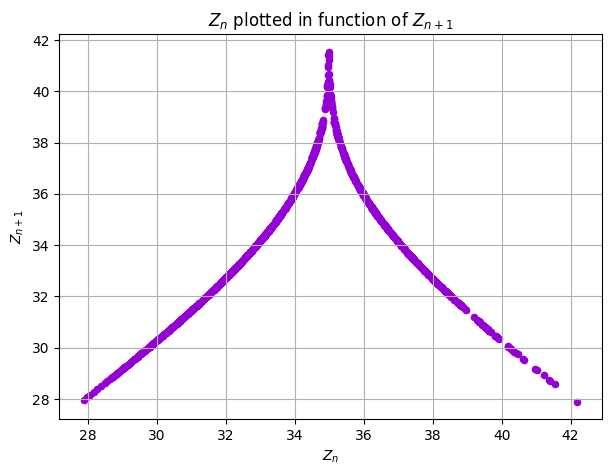

In [17]:
x_list, y_list, z_list = [1], [1], [1]
p = 25
tt1 = np.linspace(0, 250, 1000000)

for i in tt1[1:]:
  x_list.append(x_list[-1] + dt2*velocity(x_list[-1], y_list[-1], z_list[-1], p, D=10, B=8/3)[0])
  y_list.append(y_list[-1] + dt2*velocity(x_list[-1], y_list[-1], z_list[-1], p, D=10, B=8/3)[1])
  z_list.append(z_list[-1] + dt2*velocity(x_list[-1], y_list[-1], z_list[-1], p, D=10, B=8/3)[2])

z_maxima1 = [0] #n, we will use this zero to make a shift between the two lists
z_maxima2 = [] #n+1,

for n in range(len(z_list) - 2):
  if z_list[n] < z_list[n+1] and z_list[n+2] < z_list[n+1]:
    z_maxima1.append(z_list[n+1])
    z_maxima2.append(z_list[n+1])

fig6, axes6 = plt.subplots(1, 1, figsize=(7, 5))
axes6.scatter(z_maxima1[1:-1], z_maxima2[1:], s=20, c="darkviolet") # We skip the fist values to get rid of the zero
# We also skip the last element of the first list to make them equal
axes6.set_xlabel(r"$Z_n$")
axes6.set_ylabel(r"$Z_{n+1}$")
axes6.set_title(r"$Z_n$ plotted in function of $Z_{n+1}$")
axes6.grid()

plt.show()

We can see in this function that each $Z_n$ value corresponds with one $Z_{n+1}$ value, so we can conclude from this that there is a clear relation between $Z_n$ and $Z_{n+1}$